In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [15]:
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [17]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [18]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [19]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [24]:
inspector = inspect(engine)

In [25]:
columns = inspector.get_columns("Measurement")
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [58]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_twelve_months = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
last_twelve_months

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [59]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [60]:
# Perform a query to retrieve the data and precipitation scores
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [63]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_twelve_months, columns = ['date', 'precipitation'])

In [64]:
# Sort the dataframe by date
df1 = df.sort_values(by='date',ascending=True)
df1.set_index('date', inplace = True)
df1

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


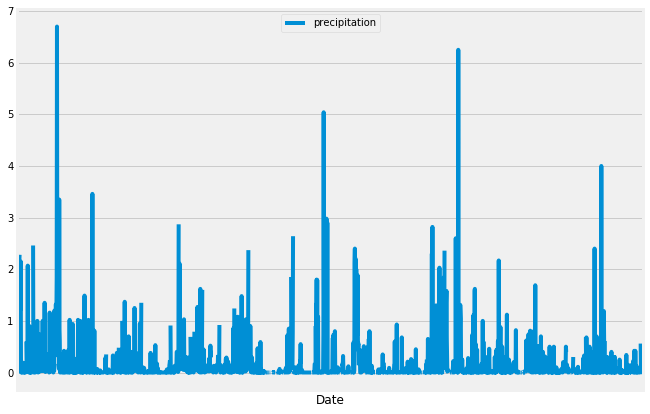

In [57]:
# Use Pandas Plotting with Matplotlib to plot the data
df1.plot(figsize = (10,7), rot = 45, use_index = True, legend=False)
plt.xticks([])
plt.grid(True)
plt.xlabel("Date")
plt.legend(loc="upper center", fontsize=10)
plt.show()

![precipitation](Images/precipitation.png)

In [65]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [66]:
# Design a query to show how many stations are available in this dataset?
available_stations = session.query(Measurement.station).group_by(Measurement.station).count()
available_stations

9

In [72]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations_active = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
stations_active



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [74]:
#Most Active Station
most_active_station = stations_active[0]
most_active_station

('USC00519281', 2772)

In [75]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(f"{min_temp}, {max_temp}, {avg_temp}")

[(54.0,)], [(85.0,)], [(71.66378066378067,)]


In [76]:
# Choose the station with the highest number of temperature observations.
most_temp_obs = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
most_temp_obs_station = most_temp_obs[0]
most_temp_obs_station

'USC00519281'

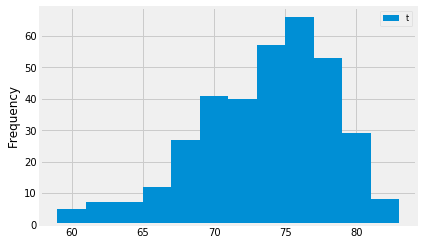

In [79]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(Measurement.tobs).filter(Measurement.station == most_temp_obs_station).filter(Measurement.date >= year_ago).all()

df_temp = pd.DataFrame(temp_obs, columns = ['tobs'])
df_temp.head()

num_bins = 12
plt.hist(df_temp["tobs"], num_bins)
plt.ylabel("Frequency", fontsize = 12)
plt.legend("tobs", loc='upper right', fontsize = 8)
plt.show()


![precipitation](Images/station-histogram.png)

In [81]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [84]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

df_temp = pd.DataFrame(calc_temps('2012-02-28', '2012-03-05'), columns = ['TMIN','TAVG','TMAX'])
df_temp


,TMIN,TAVG,TMAX
0,62.0,69.571429,74.0


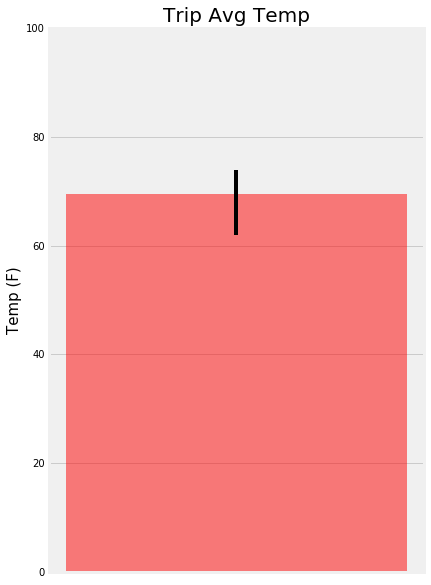

In [86]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_temp_avg=df_temp['TAVG']
x_axis = np.arange(0, 1, 1)
plt.figure(figsize=(6,10))
plt.bar(x_axis, df_temp['TAVG'], yerr=[df_temp['TAVG']-df_temp['TMIN'],df_temp['TMAX']-df_temp['TAVG']], color = 'red', alpha = .5)
plt.xticks([])
plt.ylim(0,100)
plt.title('Trip Avg Temp', fontsize = 20)
plt.ylabel('Temp (F)', fontsize=15)
plt.show()




In [109]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

total_rainfall = session.query(Station.station, Station.name, Station.latitude, Station.longitude,Station.elevation, func.avg(Measurement.prcp)).filter(Measurement.station == Station.station).group_by(Station.station).order_by(func.avg(Measurement.prcp).desc()).all()

total_rainfall_df = pd.DataFrame(total_rainfall, columns = ['Station', 'Name', 'Latitude', 'Longitude', 'Elevation', 'Avg. Precipitation (in.)'])

total_rainfall_df


,Station,Name,Latitude,Longitude,Elevation,Avg. Precipitation (in.)
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.429988
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.212352
2,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,0.207222
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.141921
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.121058
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.114961
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.063602
7,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.049020
8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,0.047971


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
